In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/class_data_science/PandasForDataManipulation/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Syntax or Spelling errors**


In [6]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Missing fields?**

In [7]:
#Figuring out how many missing values in the dataset:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Out of 8523 records there are 1463 items with missing "Item_Weight"; this will affect the analysis of the sales prediction data. I can try and find the exame same items in different rows and find out if the "Item_Weight" field was filled in and hence fill in the missing ones.
Another 2410 records are missing the Outlet_Size.

In [8]:
#The following method will find the Item_Weight from it's Item_Identifier and sends it back to the called
def filling(identifier_value):  
    return df.loc[(df['Item_Weight'].isnull() == False) & (df['Item_Identifier'] == identifier_value), 'Item_Weight'].head(1).item()

#looping in the rows and for each missing Item_Weight get the Item_Identifier and call the above method to get the existing Item_Weight for the Item_Identifier 
for index, row in df.iterrows():
  if pd.isnull(row['Item_Weight']):
    try:
      df.loc[index:index, ('Item_Weight')] = filling(row['Item_Identifier'])      
    except ValueError:
      pass
      #print(ValueError.args)

#P.S. had to figure our the try catch error handler becuase some Items didn't have any known Item Weight for other rows based on the Item_Identifier

# confirm the missing fields for the Item_Weight has been modified
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Part 3 of Project 1**

In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np

Visalize the unique outlets with the total weight of all items in each outlet.

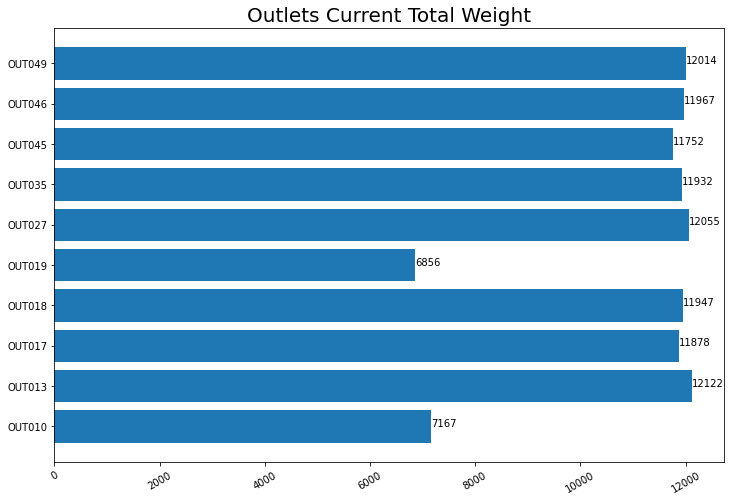

In [10]:
outlet_weights = df.groupby(['Outlet_Identifier'])['Item_Weight'].sum()
#outlet_weights
plt.figure(figsize = (12, 8));
plt.title('outlets current total weight'.title(), fontsize=20)
plt.barh(outlet_weights.index, outlet_weights.values);
plt.xticks(rotation = 30);
for index, value in enumerate(outlet_weights.values):
    plt.text(value, index, str(math.ceil(value)))


Visualize the fat Content per each outlet

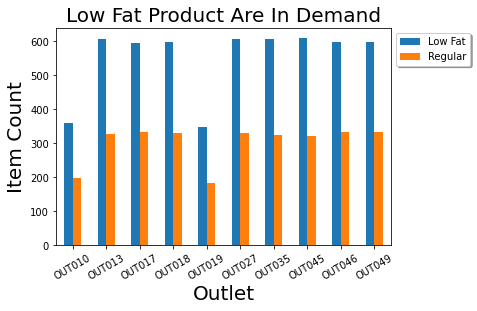

In [11]:
df.groupby(['Outlet_Identifier','Item_Fat_Content'])['Item_Fat_Content'].count().unstack().plot(kind='bar')

plt.title('low fat product are in demand'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);

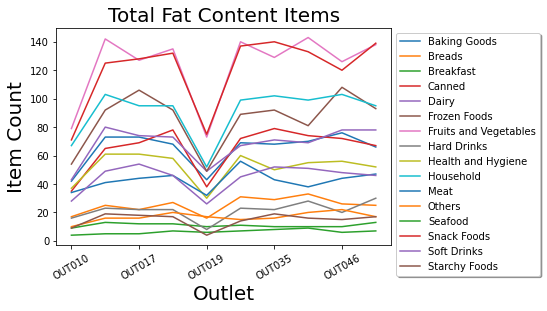

In [12]:
total_type = df.groupby(['Outlet_Identifier','Item_Type'])['Item_Type'].count().unstack()
total_type.plot()

plt.title('total fat content items'.title(), fontsize=20)
plt.xticks(rotation = 30);
plt.xlabel('Outlet', fontsize=20)
plt.ylabel('Item Count', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);
#plt.figure(figsize = (12, 8));

Depending on the audience, there are many other way to visualize the statistics of this data set.

I will start with displaying the top 5 sale items in each outlet

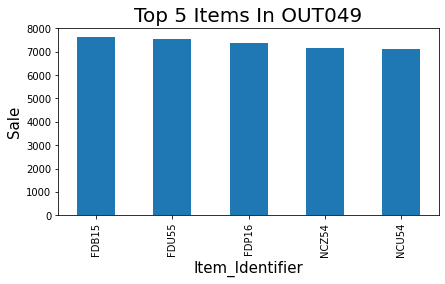

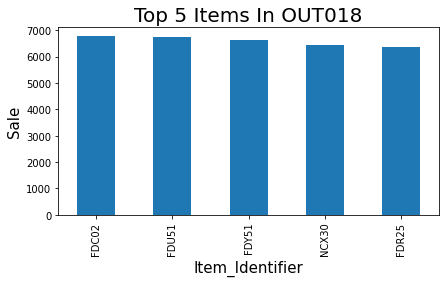

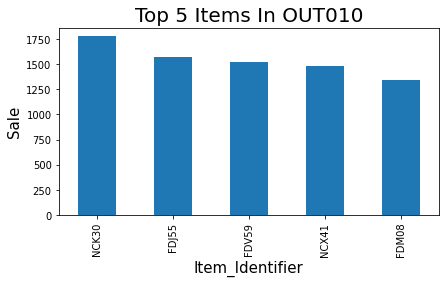

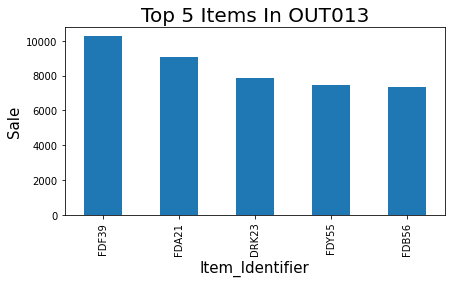

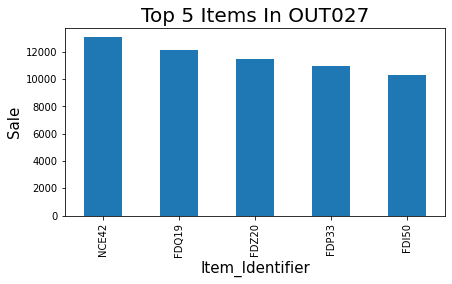

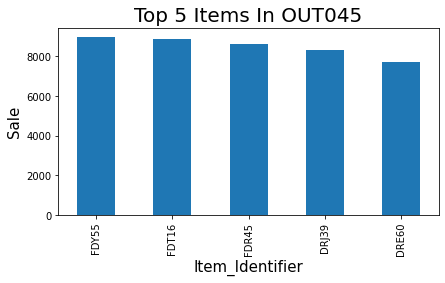

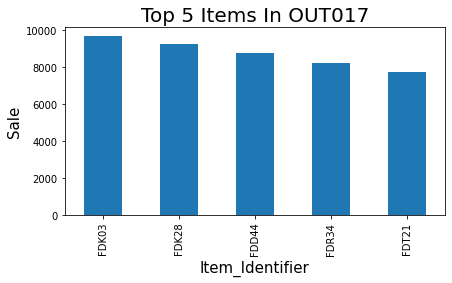

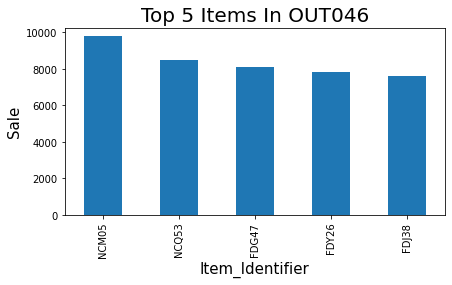

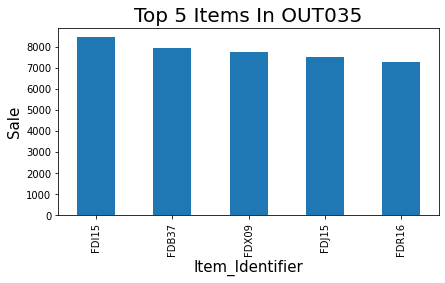

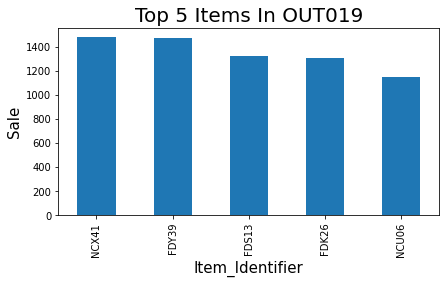

In [13]:
outlets = df['Outlet_Identifier'].unique()
for i, v in enumerate(outlets):  
  plt.figure(figsize = (15, 20))
  plt.subplot(5, 2, i+1)
  plt.title('top 5 items in '.title() + v, fontsize=20)
  plt.xticks(rotation = 30)
  plt.xlabel('Items', fontsize=15)
  plt.ylabel('Sale', fontsize=15)
  g = df.loc[df['Outlet_Identifier']== v].groupby(['Item_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(5)
  g.plot(kind='bar')  
  

I am also assuming everyone would want to see the total sales for each outlet

Text(0, 0.5, 'Sale')

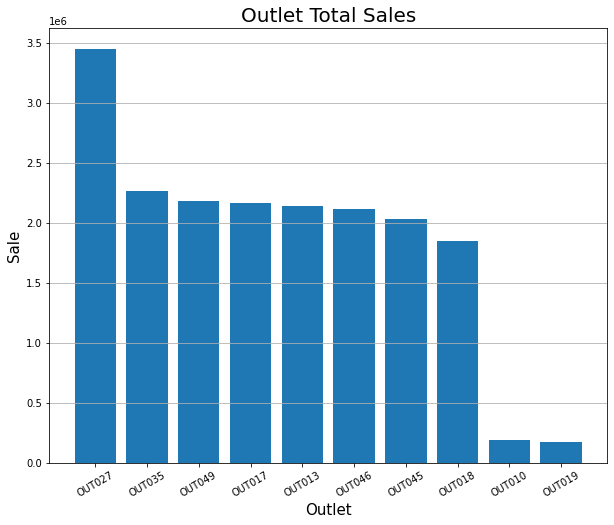

In [14]:
total_sales = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize = (10, 8))
#ploting = total_sales.plot(kind='bar')
plt.bar(total_sales.index, total_sales.values);
plt.title('outlet total sales'.title(), fontsize=20)
plt.xticks(rotation = 30)
plt.grid(axis='y')

plt.xlabel('Outlet', fontsize=15)
plt.ylabel('Sale', fontsize=15)

**Project 1 Part 4**

Histograms to view the distributions of various features in your dataset.

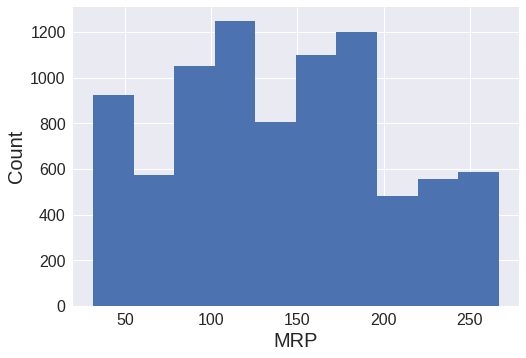

In [15]:
#It would be essential in sales predictions to get a histogram of the item MRP
plt.style.use('seaborn')
df['Item_MRP'].hist();
plt.xlabel('MRP', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#notice the high variation on the 100

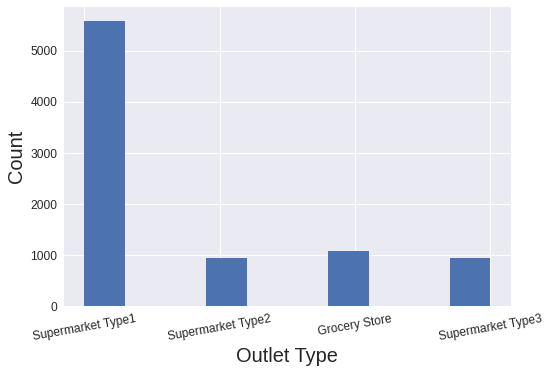

In [16]:
# I am interested in the outlet types to predict their sales
plt.style.use('seaborn')
df['Outlet_Type'].hist();
plt.xlabel('Outlet Type', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xticks(rotation = 10);
#the majority are in The Supermarket Type 1, the rest are around the same

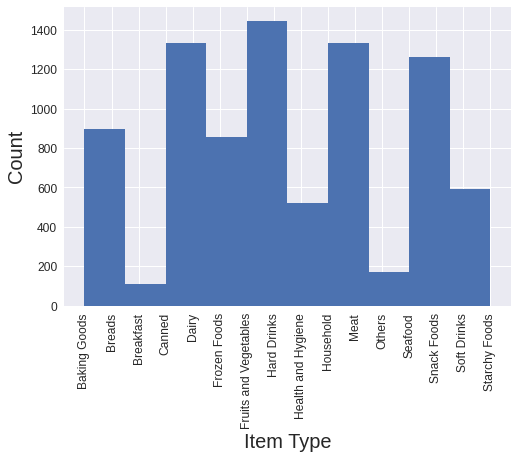

In [17]:
#interested now in sorting the items per types and hist to visualize
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Type'].hist();
plt.xlabel('Item Type', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xticks(rotation = 90);
#Fruit and Vegetables :)

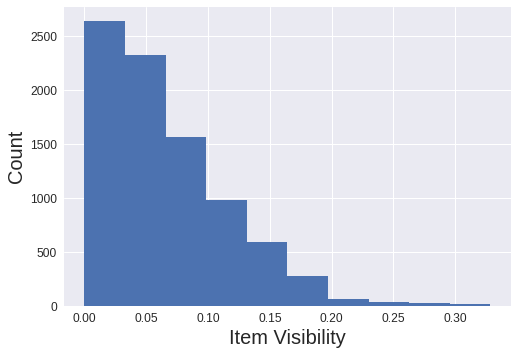

In [18]:
# I am pretty sure the item visibility also plays a role in sales
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Visibility'].hist();
plt.xlabel('Item Visibility', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

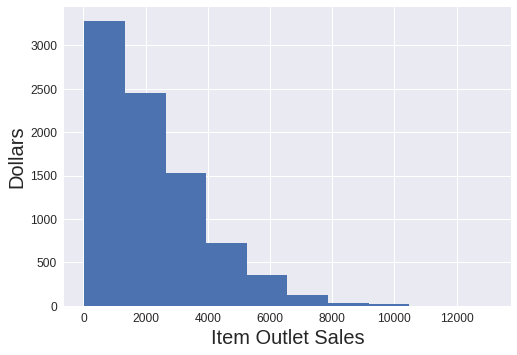

In [19]:
df_type_sorted = df.sort_values('Item_Type')
plt.style.use('seaborn')
df_type_sorted['Item_Outlet_Sales'].hist();
plt.xlabel('Item Outlet Sales', fontsize = 20);
plt.ylabel('Dollars', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

Boxplots to view statistical summaries of various features in your dataset.

In [20]:
outlet_item_sales = df.reset_index().groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].apply(list)
outlet_item_sales = outlet_item_sales.reset_index()
outlet_item_sales

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,"[732.38, 178.4344, 163.7868, 358.2004, 184.426..."
1,OUT013,"[994.7052, 343.5528, 1977.4260000000002, 3775...."
2,OUT017,"[4710.535, 838.908, 3121.2704, 4815.0656, 2285..."
3,OUT018,"[443.4228, 556.6088, 1621.8888, 2741.7644, 306..."
4,OUT019,"[214.3876, 125.8362, 780.3176, 892.172, 147.80..."
5,OUT027,"[4022.7636, 2303.6679999999997, 4064.0432, 279..."
6,OUT035,"[2748.4224, 1587.2672, 1065.28, 4865.6664, 271..."
7,OUT045,"[1076.5986, 2174.5028, 2428.8384, 5815.0972, 2..."
8,OUT046,"[2187.153, 2145.2076, 1547.3192, 4078.025, 208..."
9,OUT049,"[3735.138, 2097.27, 1516.0266, 1589.2646, 718...."


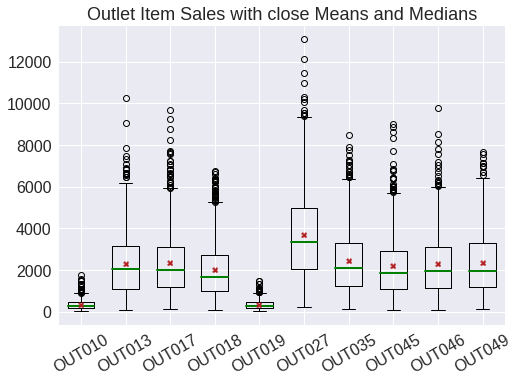

In [21]:
plt.style.use('seaborn')
indexList = []
for index, sales in enumerate(outlet_item_sales['Item_Outlet_Sales'].values):
  plt.boxplot(outlet_item_sales['Item_Outlet_Sales'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black',
              markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,outlet_item_sales['Outlet_Identifier'].values, fontsize = 16, rotation = 30)
plt.yticks(fontsize = 16)
plt.title('Outlet Item Sales with close Means and Medians', fontsize = 18);
#notice the outliers...

In [22]:
item_type_weight = df.reset_index().groupby(['Item_Type'])['Item_Weight'].apply(list)
item_type_weight = item_type_weight.reset_index()
item_type_weight

,Item_Type,Item_Weight
0,Baking Goods,"[10.395, 8.315, 15.5, 15.85, 15.85, 13.35, 12...."
1,Breads,"[17.85, 9.1, 12.6, 12.6, 17.85, 17.85, 9.6, 13..."
2,Breakfast,"[9.0, 9.0, 20.2, 18.6, 8.895, 10.695, 21.1, 7...."
3,Canned,"[14.5, 21.35, 12.15, 10.0, 9.895, 5.94, 7.855,..."
4,Dairy,"[9.3, 18.5, 13.35, 5.925, 19.25, 13.35, 6.42, ..."
5,Frozen Foods,"[16.2, 19.2, 13.85, 10.195, 15.5, 8.39, 19.0, ..."
6,Fruits and Vegetables,"[19.2, 11.8, 15.1, 16.35, 20.2, 10.895, 10.0, ..."
7,Hard Drinks,"[8.26, 11.65, 8.365, 8.88, 9.3, 15.75, 9.3, 12..."
8,Health and Hygiene,"[11.8, 18.6, 10.0, 19.6, 7.39, 8.645, 9.8, 12...."
9,Household,"[8.93, 14.6, 13.0, 12.15, 9.195, 7.825, 18.85,..."


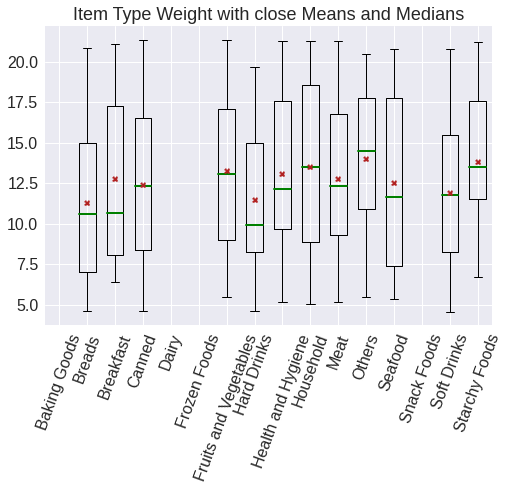

In [26]:
plt.style.use('seaborn')
indexList = []
for index, sales in enumerate(item_type_weight['Item_Weight'].values):
  plt.boxplot(item_type_weight['Item_Weight'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black',
              markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,item_type_weight['Item_Type'].values, fontsize = 16, rotation = 70)
plt.yticks(fontsize = 16)
plt.title('Item Type Weight with close Means and Medians', fontsize = 18);
#notice the outliers...

heatmaps of the correlation between features.

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


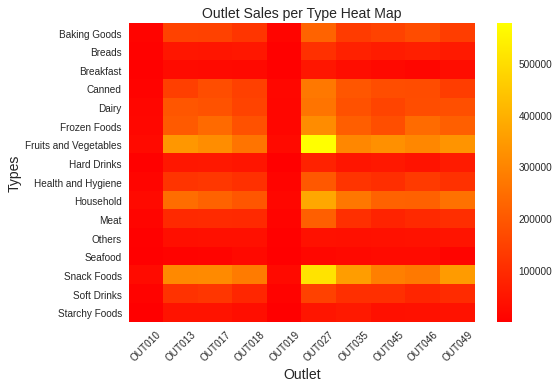

In [61]:
sales_per_outlet = df.groupby(['Outlet_Identifier', 'Item_Type'])[['Item_Outlet_Sales']].sum()
#sales_per_outlet
heatmap_data = pd.pivot_table(sales_per_outlet, values='Item_Outlet_Sales', index=['Item_Type'], columns='Outlet_Identifier')

sns.heatmap(heatmap_data, cmap='autumn');
plt.xlabel("Outlet", size=14)
plt.ylabel("Types", size=14)
plt.title("Outlet Sales per Type Heat Map", size=14)
plt.xticks(rotation = 45);
plt.tight_layout()

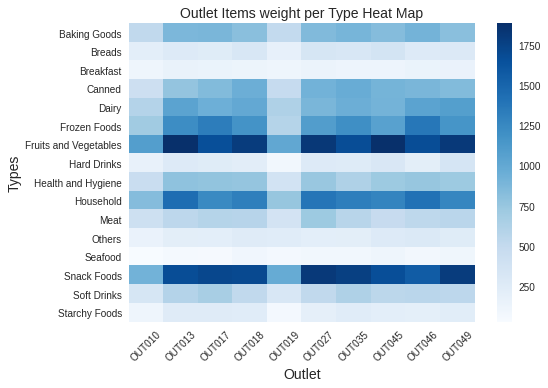

In [62]:
weight_per_outlet = df.groupby(['Outlet_Identifier', 'Item_Type'])[['Item_Weight']].sum()

heatmap_data_wieght = pd.pivot_table(weight_per_outlet, values='Item_Weight', index=['Item_Type'], columns='Outlet_Identifier')

sns.heatmap(heatmap_data_wieght, cmap='Blues');
plt.xlabel("Outlet", size=14)
plt.ylabel("Types", size=14)
plt.title("Outlet Items Weight per Type Heat Map", size=14)
plt.xticks(rotation = 45);
plt.tight_layout()